# Final Python Assignment

Use the following table to provide us with

|name | student number|
|----|----|
|Ward Stolk| 2003528|
|Daan van der Hamsvoort| 2002508|

# Read this carefully

This is the final assignment for python. You also need to make the R part of this final assignment. 

With this python part of the final assignment, you can earn 4 points.

This assignment needs to be uploaded June 13 (23:59 at the latest). You cannot use this assignment for the resit!

After you have finished this exam, do the following:

* upload your python and R files to github
* create two links in your README file:

    * one link to "final python assignment"
    * one link to "final R assignment"

* fill in the google form (see link on Blackboard) that you have uploaded your files
* use the same student number you gave us before, otherwise we cannot retrieve your pass/fail grades


# Bargaining model

In the python lectures we considered a two period bargaining model. In the assignment of week 5, we extended this to a three period model.

In this final assignment we are going to extend the model to $n$ periods, where $n$ is a variable.

Although in the lectures and assignments we worked with plotly to make graphs, here we will use [matplotlib](https://matplotlib.org/). Hence, you need to google to see how plots are made using this library. An important aspect of using open source software is that you can figure out yourself how to use (new) things.


# Import libraries

First, we need to import some libraries:

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**1)** [0.5 point] Use `np.arrange` to create a list of offers between 0.0 and 10.0 (including 10.0) with step 0.1:

In [46]:
step = 0.1
min_offer = 0.0
max_offer = 10.0

offers = np.arange(min_offer, max_offer + .1, step)

*Explanation:*

We define the minimum offer, maximum offer and the size of the steps. Then we create a variable offer, which uses np.arange. We have to do max_offer + .1 otherwise the list offers would not contain 10.0.


**2)** [0.5 point] Introduce the functions `accept_offer` and `make_offer` as in the lecture:

In [47]:
def accept_offer(offer,your_outside_option):
    accept = (offer >= your_outside_option)
    return accept
    
def make_offer(your_outside_option,other_outside_option):
    profits = [(max_offer-offer)*accept_offer(offer,other_outside_option) for offer in offers]
    max_profit = max(profits)
    max_index = profits.index(max_profit)
    if max_profit >= your_outside_option:
        your_offer = offers[max_index]
        your_profit = max_offer-offers[max_index]
        other_profit = offers[max_index]
    else:
        your_offer = -1
        your_profit = your_outside_option
        other_profit = other_outside_option
    return your_offer, your_profit, other_profit


*Explanation:*

For the accept_offer function we made it accept if the offer is bigger than or as big as the outside option. 

We made the make_offer function in a way that it will return your_offer, your_profit and other_profit in that order. Otherwise it will return -1 for your_offer, and then no offer is made. 

**3)** [0.5 point] Initialize a dictionary `offer` as in the assignment of week 5:

In [48]:
offer = {}

*Explanation:*

This function defines that the offer dictionary is empty

**4)** [0.5 point] Complete the following function such that it returns the payoffs to players 1 and 2 for a game of length $n$ periods when the discount factor is given by $\delta$:

In [49]:
def outcome(n,delta):
    offer[n+1]=[0,0,0]
    for i in range(n):
        offer[n-i]= make_offer(delta*offer[(n-i)+1][2], delta*offer[(n-i)+1][1])
    return offer

*Explanation:*
 
 We have to do a discount of our future (n-i), (n-i) in the future is [(n-i)+1]. To discount it we do the offer times delta. The 2 stands for the second round, and the 1 for the first round, since the first round is the outside option for the second round.
 

**5)** [0.5 point] Check the outcomes for the case where $\delta = 0.9$, $n=1, 2$ and $n=3$ (these are outcomes that you have seen before).

In [50]:
delta = 0.9
n = 1
outcome(n,delta)

{1: (0.0, 10.0, 0.0), 2: [0, 0, 0]}

In [51]:
delta = 0.9
n = 2
outcome(n,delta)

{1: (9.0, 1.0, 9.0), 2: (0.0, 10.0, 0.0), 3: [0, 0, 0]}

In [52]:
delta = 0.9
n = 3
outcome(n,delta)

{1: (0.90000000000000002, 9.0999999999999996, 0.90000000000000002),
 2: (9.0, 1.0, 9.0),
 3: (0.0, 10.0, 0.0),
 4: [0, 0, 0]}

*Explanation:*

We have seen these outcomes before in assignment 5. 

**6)** [1 point] *Using matplotlib* plot for the case with $\delta =0.9$, the payoff for player 1 of a game that lasts for 1 round, a game that lasts for 2 rounds, up till a game that lasts 30 rounds. On the horizontal axis, we have the length of the game $n$; on the vertical axis the payoff to player 1.

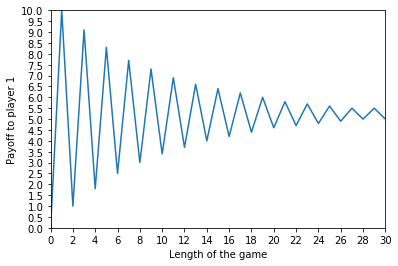

In [53]:
n=30
delta = 0.9
range_n = [n for n in range(31)]
payoff_player_1 = [outcome(n,delta)[1][1] for n in range(31)]
plt.ylim(0.0,10.0)
plt.yticks (np.arange(0,10.5, 0.5))
plt.ylabel("Payoff to player 1")
plt.xlim(0,30)
plt.xticks (np.arange(0,32,2))
plt.xlabel("Length of the game")
plt.plot(range_n, payoff_player_1)


*Explanation:*

payoff_player_1 is the payoff of player 1, in period n, we used range(31) because otherwise n = 30 would excluded. From lines 5 until 8 we define the the range, ticks and label of the y-axis, and from line 8 until 11 we define the range ticks and label of the x-axis. Line 11 plots our graph. 

**7)** [0.5 point] What pattern do you see in the graph? What is the intuition/explanation for this? [hint: if you cannot plot the outcome with matplotlib, you can still answer this question; e.g. simply by looking at the outcomes for different values of $n$]

*Explanation:*
    
The graph rises and falls over and over again, but in a declining strongness. This can be explained by the fact that the power of player 1 is a lot bigger than the power of player 2 if he has the last move, and there are little rounds in the game, and the other way round. If the game takes longer the final outcome for player 1 will come closer to 5.